In [1]:
!pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [4]:
##import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset=pd.read_csv('/content/drive/MyDrive/AI&DS ML DL Project /Deep Learning_ ANN/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
##Divide the dataset into idependent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [9]:
##Feature Engieering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
##concatenete these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)


In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X=pd.concat([X,geography,gender],axis=1)

In [13]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
##Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
#lets initialize the ANN
classifier=Sequential()

In [20]:
##Adding the input Layer
classifier.add(Dense(units=11,activation='relu'))

In [21]:
##adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [22]:
##adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [23]:
##Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [24]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [25]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


Early stopping is a regularization technique used in Deep Learning to prevent overfitting. It stops training when the model’s performance on the validation set starts to degrade (i.e., when validation loss stops improving).



In [26]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [27]:
model_histry = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000,callbacks=early_stopping)


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7899 - loss: 0.4945 - val_accuracy: 0.8201 - val_loss: 0.4114
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8155 - loss: 0.4240 - val_accuracy: 0.8224 - val_loss: 0.3994
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8118 - loss: 0.4065 - val_accuracy: 0.8046 - val_loss: 0.4051
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8150 - loss: 0.4026 - val_accuracy: 0.8289 - val_loss: 0.3905
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8173 - loss: 0.3910 - val_accuracy: 0.8213 - val_loss: 0.3865
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8135 - loss: 0.3997 - val_accuracy: 0.8167 - val_loss: 0.3808
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8069 - loss: 0.4008 - val_accuracy: 0.8289 - val_loss: 0.3799
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8168 - loss: 0.3943 - 

In [28]:
model_histry.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

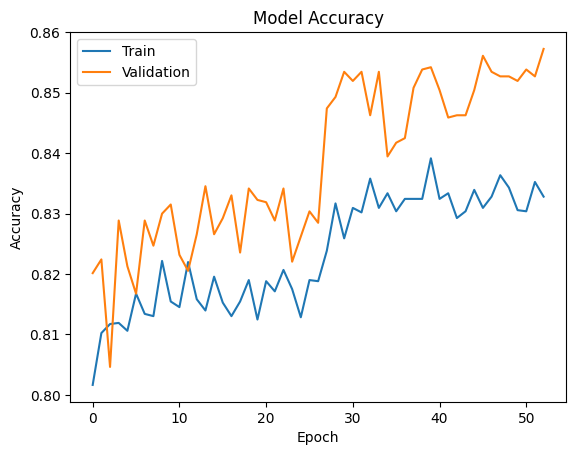

In [29]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(model_histry.history['accuracy'])
plt.plot(model_histry.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

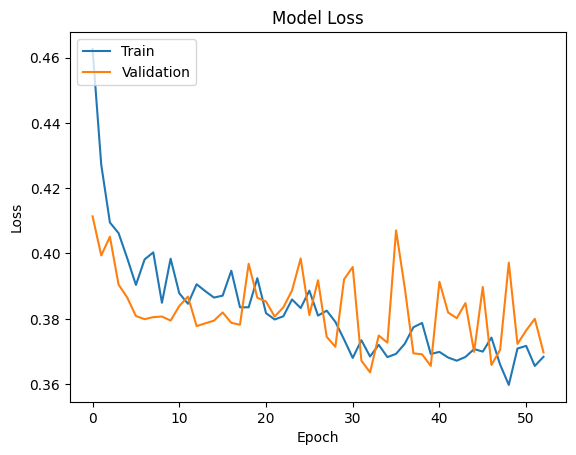

In [30]:
# Plot loss
plt.plot(model_histry.history['loss'])
plt.plot(model_histry.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [32]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1547,   48],
       [ 220,  185]])

In [33]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

score

0.866

In [34]:
## get the weights
classifier.get_weights()

[array([[-5.59548335e-03,  3.58513221e-02,  2.76204497e-02,
         -1.79548347e+00, -7.71657169e-01,  5.40652990e-01,
          1.10916412e+00, -3.00922662e-01, -3.24273527e-01,
         -1.36403099e-01, -1.22787595e-01],
        [ 6.50326967e-01,  1.90275896e+00, -1.68224263e+00,
         -7.41294324e-01,  4.57829762e+00, -1.26347315e+00,
         -1.93862522e+00,  1.33943951e+00,  2.80676436e+00,
          4.74285543e-01,  1.32338834e+00],
        [ 1.98541790e-01,  5.90920687e-01, -3.19931865e-01,
         -5.50722063e-01, -2.51873851e-01,  1.17335427e+00,
          1.76604819e-02, -8.25973690e-01, -1.79876372e-01,
         -2.50559241e-01, -2.44683027e-01],
        [-1.25603282e+00,  3.73658866e-01, -5.50880656e-02,
          2.23389015e-01,  1.08794426e-04, -2.00633430e+00,
         -1.09604800e+00, -2.32362366e+00, -1.83242440e-01,
          3.19406080e+00,  6.32153392e-01],
        [-3.96501613e+00, -2.51971900e-01,  4.08575296e-01,
          8.26138735e-01, -1.97514129e+00,  

In [35]:
!pip install -q streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [36]:
!pip install streamlit pyngrok --quiet


In [42]:
# Step 1: Import libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

# Step 2: Create some dummy training data
# Let's say we have 10 features
X_train = np.random.rand(1000, 10)  # 1000 samples, 10 features
y_train = np.random.randint(0, 2, (1000, 1))  # Binary target

# Step 3: Define a simple ANN
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Step 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Step 6: Save the model
model.save("ann_model.h5")
print("✅ Model saved as ann_model.h5")

# Step 7: Reload the saved model
loaded_model = load_model("ann_model.h5")
print("✅ Model reloaded successfully!")

# Step 8: Test prediction
sample_input = np.random.rand(1, 10)
prediction = loaded_model.predict(sample_input)
print("Sample prediction:", prediction)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4861 - loss: 0.6990
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5146 - loss: 0.6954
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5175 - loss: 0.6966
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4986 - loss: 0.6944
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5141 - loss: 0.6897


✅ Model saved as ann_model.h5


✅ Model reloaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Sample prediction: [[0.53988075]]


In [53]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib
import os
from sklearn.preprocessing import LabelEncoder

# ===== Load label encoders =====
if os.path.exists("geo_encoder.pkl") and os.path.exists("gender_encoder.pkl"):
    geo_encoder = joblib.load("geo_encoder.pkl")
    gender_encoder = joblib.load("gender_encoder.pkl")
    print("✅ Label encoders loaded.")
else:
    # Create new encoders with default categories (demo mode)
    print("⚠ Encoders not found. Creating demo label encoders.")
    geo_encoder = LabelEncoder()
    geo_encoder.fit(["France", "Germany", "Spain"])
    gender_encoder = LabelEncoder()
    gender_encoder.fit(["Male", "Female"])
    joblib.dump(geo_encoder, "geo_encoder.pkl")
    joblib.dump(gender_encoder, "gender_encoder.pkl")
    print("✅ New encoders created and saved.")

# ===== Load model =====
if os.path.exists("ann_model.h5"):
    model = load_model("ann_model.h5")
    print("✅ Model loaded.")
else:
    st.error("❌ ann_model.h5 not found. Please provide a trained model file.")
    st.stop()

# ===== Streamlit UI =====
st.set_page_config(page_title="Customer Churn Predictor", layout="centered")
st.title("📊 Customer Churn Prediction using ANN")

st.sidebar.header("Enter Customer Information")

def user_input():
    CreditScore = st.sidebar.slider('Credit Score', 350, 850, 600)
    Geography = st.sidebar.selectbox('Geography', ['France', 'Germany', 'Spain'])
    Gender = st.sidebar.selectbox('Gender', ['Male', 'Female'])
    Age = st.sidebar.slider('Age', 18, 92, 35)
    Tenure = st.sidebar.slider('Tenure (Years with Bank)', 0, 10, 5)
    Balance = st.sidebar.number_input('Account Balance', 0.0, 250000.0, 100000.0)
    NumOfProducts = st.sidebar.selectbox('Number of Products', [1, 2, 3, 4])
    HasCrCard = st.sidebar.selectbox('Has Credit Card?', [0, 1])
    IsActiveMember = st.sidebar.selectbox('Is Active Member?', [0, 1])
    EstimatedSalary = st.sidebar.number_input('Estimated Salary', 10000.0, 200000.0, 50000.0)

    data = {
        'CreditScore': [CreditScore],
        'Geography': [Geography],
        'Gender': [Gender],
        'Age': [Age],
        'Tenure': [Tenure],
        'Balance': [Balance],
        'NumOfProducts': [NumOfProducts],
        'HasCrCard': [HasCrCard],
        'IsActiveMember': [IsActiveMember],
        'EstimatedSalary': [EstimatedSalary]
    }

    return pd.DataFrame(data)

input_df = user_input()

if st.button("Predict Churn"):
    # ===== Apply label encoding to categorical columns =====
    input_df['Geography'] = geo_encoder.transform(input_df['Geography'])
    input_df['Gender'] = gender_encoder.transform(input_df['Gender'])

    # ===== Ensure feature order matches training =====
    feature_order = [
        'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
        'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
    ]
    processed = input_df[feature_order].values  # shape will be (1, 10)

    # ===== Make prediction =====
    prediction = model.predict(processed)
    churn = int(prediction[0][0] > 0.5)

    st.subheader("🔍 Prediction Result:")
    if churn == 1:
        st.error("❌ This customer is likely to churn.")
    else:
        st.success("✅ This customer is likely to stay.")
    st.markdown(f"**Churn Probability:** `{prediction[0][0]:.2f}`")


Overwriting app.py


In [54]:
!ngrok config add-authtoken 30C8wkg2tGrb45kYOsev00tnh8M_64mNg8kLU1gRUenKgeaFf



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [55]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.188.87:8501

⠴⠦⠧⠇⠏⠋your url is: https://loose-bottles-argue.loca.lt
2025-08-09 13:09:05.479651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754744945.524763    6489 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754744945.538752    6489 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754744945.572088    6489 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754744945.5721